In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./dataset/credit-a.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [3]:
x = data.iloc[:,:-1]
# 把-1改成0
y = data.iloc[:,-1].replace(-1, 0)

In [4]:
y.value_counts()

1    357
0    296
Name: 15, dtype: int64

In [5]:
# 创建顺序模型
# model = tf.keras.Sequential([
#     # 第1个隐藏层
#     tf.keras.layers.Dense(4, input_shape=(15,), activation="relu"),
#     # 第2个隐藏层
#     tf.keras.layers.Dense(4, activation="relu"),
#     # 输出层 激活函数改用 sigmoid ???
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(15,), activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="relu"))
# 输出层 激活函数改用 sigmoid ???
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    optimizer="adam",
    # 二元交叉熵
    loss="binary_crossentropy",
    # 记录训练过程中的相关值，如准确率，损失值
    metrics=['acc']
)

In [8]:
history = model.fit(x, y, epochs=100)

Train on 653 samples
Epoch 1/100
653/653 [==============================] - 0s 106us/sample - loss: 3.5901 - acc: 0.6753
Epoch 2/100
653/653 [==============================] - 0s 24us/sample - loss: 3.3646 - acc: 0.6753
Epoch 3/100
653/653 [==============================] - 0s 21us/sample - loss: 3.1013 - acc: 0.6784
Epoch 4/100
653/653 [==============================] - 0s 21us/sample - loss: 2.7549 - acc: 0.6799
Epoch 5/100
653/653 [==============================] - 0s 23us/sample - loss: 2.4024 - acc: 0.6815
Epoch 6/100
653/653 [==============================] - 0s 23us/sample - loss: 2.0868 - acc: 0.6799
Epoch 7/100
653/653 [==============================] - 0s 23us/sample - loss: 1.5639 - acc: 0.6784
Epoch 8/100
653/653 [==============================] - 0s 24us/sample - loss: 0.9100 - acc: 0.6692
Epoch 9/100
653/653 [==============================] - 0s 23us/sample - loss: 0.6705 - acc: 0.6907
Epoch 10/100
653/653 [==============================] - 0s 21us/sample - loss: 0.6585 -

653/653 [==============================] - 0s 24us/sample - loss: 0.5919 - acc: 0.7182
Epoch 82/100
653/653 [==============================] - 0s 21us/sample - loss: 0.5911 - acc: 0.7289
Epoch 83/100
653/653 [==============================] - 0s 24us/sample - loss: 0.5898 - acc: 0.7228
Epoch 84/100
653/653 [==============================] - 0s 24us/sample - loss: 0.5880 - acc: 0.7274
Epoch 85/100
653/653 [==============================] - 0s 24us/sample - loss: 0.5878 - acc: 0.7167
Epoch 86/100
653/653 [==============================] - 0s 23us/sample - loss: 0.5839 - acc: 0.7243
Epoch 87/100
653/653 [==============================] - 0s 24us/sample - loss: 0.5830 - acc: 0.7305
Epoch 88/100
653/653 [==============================] - 0s 23us/sample - loss: 0.5815 - acc: 0.7335
Epoch 89/100
653/653 [==============================] - 0s 24us/sample - loss: 0.5817 - acc: 0.7274
Epoch 90/100
653/653 [==============================] - 0s 24us/sample - loss: 0.5793 - acc: 0.7335
Epoch 91/100


In [9]:
history.history.keys()

dict_keys(['loss', 'acc'])

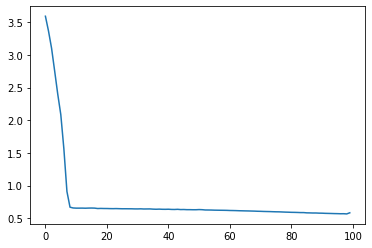

In [10]:
plt.plot(history.epoch, history.history.get('loss'))

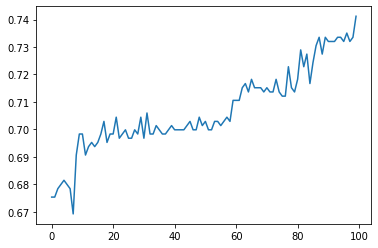

In [11]:
plt.plot(history.epoch, history.history.get('acc'))

In [12]:
model.evaluate(x, y)

653/653 [==============================] - 0s 35us/sample - loss: 0.5646 - acc: 0.7397


[0.5645562855792082, 0.73966306]